In [1]:
# Importing the libraries

import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

%matplotlib inline

# Ignore harmless warnings 

import warnings 
warnings.filterwarnings("ignore")

# Set to display all the columns in dataset

pd.set_option("display.max_columns", None)

# Import psql to run queries 

import pandasql as psql

In [2]:
# Load the general dataset

DiabData = pd.read_excel(r"C:\Users\Admin\Downloads\Raju Sir DLS\Outliers_Diabetes.xlsx", header=0)


# Display first 5 records

DiabData.head()

# Copy the data to backup file

#DiabData_BK = DaibData.copy()


,Age,Glucose,BMI,Diabetes
0,50,148,33.6,0.627
1,31,85,26.6,0.351
2,32,183,23.3,0.672
3,21,89,28.1,0.167
4,33,137,43.1,2.288


In [3]:
# Display the shape of the dataset

DiabData.shape

(768, 4)

In [4]:
# Display "Descriptive Statistical Analysis"

DiabData.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
Diabetes,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42


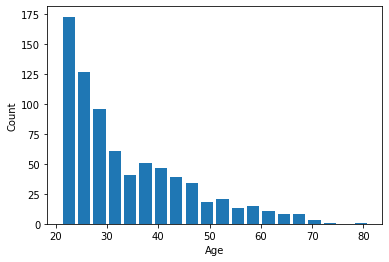

In [5]:
# Plot Histogram with 'Age'

plt.hist(DiabData.Age, bins=20, rwidth=0.8)
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

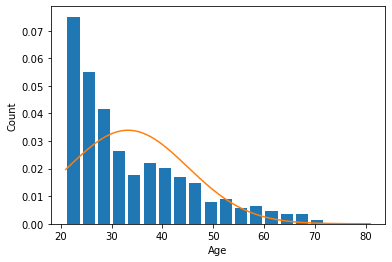

In [6]:
# Gaussian distribution (also known as normal distribution) is a bell-shaped curve

from scipy.stats import norm

plt.hist(DiabData.Age, bins=20, rwidth=0.8, density=True)
plt.xlabel('Age')
plt.ylabel('Count')

rng = np.arange(DiabData.Age.min(), DiabData.Age.max(), 0.1)
plt.plot(rng, norm.pdf(rng, DiabData.Age.mean(),DiabData.Age.std()))

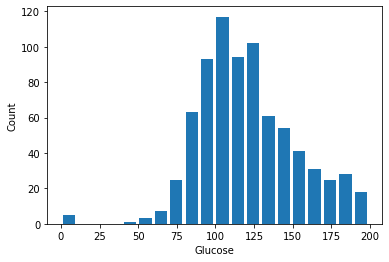

In [7]:
# Plot Histogram with 'Glucose'

plt.hist(DiabData.Glucose, bins=20, rwidth=0.8)
plt.xlabel('Glucose')
plt.ylabel('Count')
plt.show()

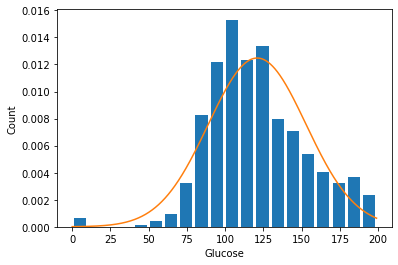

In [8]:
# Gaussian distribution (also known as normal distribution) is a bell-shaped curve

from scipy.stats import norm

plt.hist(DiabData.Glucose, bins=20, rwidth=0.8, density=True)
plt.xlabel('Glucose')
plt.ylabel('Count')

rng = np.arange(DiabData.Glucose.min(), DiabData.Glucose.max(), 0.1)
plt.plot(rng, norm.pdf(rng, DiabData.Glucose.mean(),DiabData.Glucose.std()))

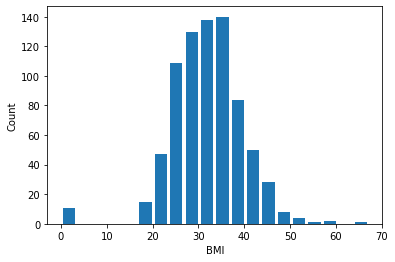

In [9]:
# Plot Histogram with 'BMI'

plt.hist(DiabData.BMI, bins=20, rwidth=0.8)
plt.xlabel('BMI')
plt.ylabel('Count')
plt.show()

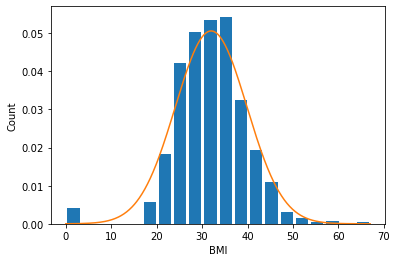

In [10]:
# Gaussian distribution (also known as normal distribution) is a bell-shaped curve

from scipy.stats import norm

plt.hist(DiabData.BMI, bins=20, rwidth=0.8, density=True)
plt.xlabel('BMI')
plt.ylabel('Count')

rng = np.arange(DiabData.BMI.min(), DiabData.BMI.max(), 0.1)
plt.plot(rng, norm.pdf(rng, DiabData.BMI.mean(),DiabData.BMI.std()))

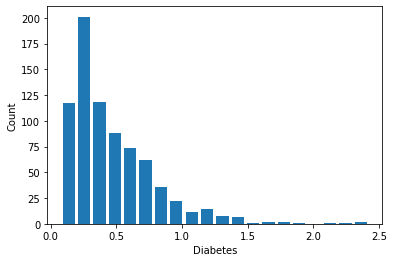

In [11]:
# Plot Histogram with 'Diabetes'

plt.hist(DiabData.Diabetes, bins=20, rwidth=0.8)
plt.xlabel('Diabetes')
plt.ylabel('Count')
plt.show()

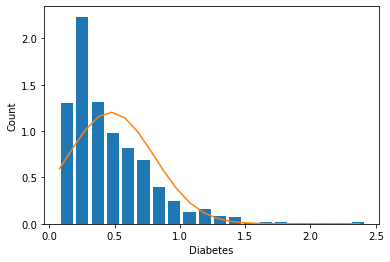

In [12]:
# Gaussian distribution (also known as normal distribution) is a bell-shaped curve

from scipy.stats import norm

plt.hist(DiabData.Diabetes, bins=20, rwidth=0.8, density=True)
plt.xlabel('Diabetes')
plt.ylabel('Count')

rng = np.arange(DiabData.Diabetes.min(), DiabData.Diabetes.max(), 0.1)
plt.plot(rng, norm.pdf(rng, DiabData.Diabetes.mean(),DiabData.Diabetes.std()))

In [13]:
DiabData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       768 non-null    int64  
 1   Glucose   768 non-null    int64  
 2   BMI       768 non-null    float64
 3   Diabetes  768 non-null    float64
dtypes: float64(2), int64(2)
memory usage: 24.1 KB


In [14]:
# Calculate the Lower Limit and Upper Limit of each variable

Agell = round(DiabData.Age.mean() - 3 * DiabData.Age.std(), 3)
Ageul = round(DiabData.Age.mean() + 3 * DiabData.Age.std(),3)
Glull = round(DiabData.Glucose.mean() - 3 * DiabData.Glucose.std(), 3)
Gluul = round(DiabData.Glucose.mean() + 3 * DiabData.Glucose.std(), 3)
BMIll = round(DiabData.BMI.mean() - 3 * DiabData.BMI.std(), 3)
BMIul = round(DiabData.BMI.mean() + 3 * DiabData.BMI.std(),3)
Diabll = round(DiabData.Diabetes.mean() - 3 * DiabData.Diabetes.std(), 3)
Diabul = round(DiabData.Diabetes.mean() + 3 * DiabData.Diabetes.std(),3)

In [15]:
# Eliminate the outliers

DiabData_new = DiabData[(DiabData.Age > Agell) & (DiabData.Age < Ageul)]
DiabData_new = DiabData_new[(DiabData_new.Glucose > Glull) & (DiabData_new.Glucose < Gluul)]
DiabData_new = DiabData_new[(DiabData_new.BMI > BMIll) & (DiabData_new.BMI < BMIul)]
DiabData_new = DiabData_new[(DiabData_new.Diabetes > Diabll) & (DiabData_new.Diabetes < Diabul)]
DiabData_new.head()

,Age,Glucose,BMI,Diabetes
0,50,148,33.6,0.627
1,31,85,26.6,0.351
2,32,183,23.3,0.672
3,21,89,28.1,0.167
5,30,116,25.6,0.201


In [16]:
# New data shape with no of deleted records

DiabData_new.shape

(736, 4)

In [23]:
#Original data

DiabData.shape

(768, 4)

In [24]:
#Total no of outliers

DiabData.shape[0] - DiabData_new.shape[0]

32

# Box plot Method for finding outliers

<AxesSubplot:xlabel='Diabetes'>

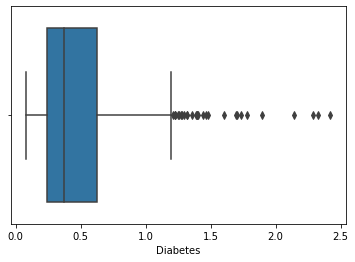

In [17]:
# Display the box plot to show the outliers

import seaborn as sns

sns.boxplot(x=DiabData["Diabetes"])

In [26]:
DiabData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       768 non-null    int64  
 1   Glucose   768 non-null    int64  
 2   BMI       768 non-null    float64
 3   Diabetes  768 non-null    float64
dtypes: float64(2), int64(2)
memory usage: 24.1 KB


In [22]:
# Calculating the Q1, Q3 and Inter quartile range (IQR) for Age

Age_first_quantile = DiabData["Age"].quantile(.25)
Age_third_quantile = DiabData["Age"].quantile(.75)
Age_IQR = Age_third_quantile - Age_first_quantile
print("Age IQR", Age_IQR)
# Calculate the Upper bound for Age

Age_Upper_bound = round(Age_third_quantile + 1.5 * Age_IQR, 3)
print("Age Upper bound", Age_Upper_bound )

# Calculate the lower bound for Age

Age_Lower_bound = round(Age_first_quantile - 1.5 * Age_IQR, 3)
print("Age Lower bound", Age_Lower_bound)




# Calculating the Q1, Q3 and Inter quartile range (IQR) for Glucose

Gluc_first_quantile = DiabData["Glucose"].quantile(.25)
Gluc_third_quantile = DiabData["Glucose"].quantile(.75)
Gluc_IQR = Gluc_third_quantile - Gluc_first_quantile
print("Glucose IQR", Gluc_IQR)
# Calculate the Upper bound for Glucose

Gluc_Upper_bound = round(Gluc_third_quantile + 1.5 * Gluc_IQR, 3)
print("Glucose Upper bound", Gluc_Upper_bound)

# Calculate the lower bound for Glucose

Gluc_Lower_bound = round(Gluc_first_quantile - 1.5 * Gluc_IQR, 3)
print("Glucose Lower bound", Gluc_Lower_bound)



# Calculating the Q1, Q3 and Inter quartile range (IQR) for BMI

BMI_first_quantile = DiabData["BMI"].quantile(.25)
BMI_third_quantile = DiabData["BMI"].quantile(.75)
BMI_IQR = BMI_third_quantile - BMI_first_quantile
print("BMI IQR", BMI_IQR)
# Calculate the Upper bound for BMI

BMI_Upper_bound = round(BMI_third_quantile + 1.5 * BMI_IQR, 3)
print("BMI Upper bound", BMI_Upper_bound)

# Calculate the lower bound for BMI

BMI_Lower_bound = round(BMI_first_quantile - 1.5 * BMI_IQR, 3)
print("BMI Lower bound", BMI_Lower_bound)



## Calculating the Q1, Q3 and Inter quartile range (IQR) for Diabetes

Diab_first_quantile = DiabData["Diabetes"].quantile(.25)
Diab_third_quantile = DiabData["Diabetes"].quantile(.75)
Diab_IQR = Diab_third_quantile - Diab_first_quantile
print("Diabetes IQR", Diab_IQR)

# Calculate the Upper bound for Diabetes

Diab_Upper_bound = round(Diab_third_quantile + 1.5 * Diab_IQR, 3)
print("Diabetes Upper bound", Diab_Upper_bound)

# Calculate the lower bound for Diabetes

Diab_Lower_bound = round(Diab_first_quantile - 1.5 * Diab_IQR, 3)
print("Diabetes Lower bound",Diab_Lower_bound)


Age IQR 17.0
Age Upper bound 66.5
Age Lower bound -1.5
Glucose IQR 41.25
Glucose Upper bound 202.125
Glucose Lower bound 37.125
BMI IQR 9.3
BMI Upper bound 50.55
BMI Lower bound 13.35
Diabetes IQR 0.38249999999999995
Diabetes Upper bound 1.2
Diabetes Lower bound -0.33


In [23]:
# Eliminate the outliers

DiabData_new = DiabData[(DiabData.Age > Age_Lower_bound) & (DiabData.Age < Age_Upper_bound)]
DiabData_new = DiabData_new[(DiabData_new.Glucose > Gluc_Lower_bound) & (DiabData_new.Glucose < Gluc_Upper_bound)]
DiabData_new = DiabData_new[(DiabData_new.BMI > BMI_Lower_bound) & (DiabData_new.BMI < BMI_Upper_bound)]
DiabData_new = DiabData_new[(DiabData_new.Diabetes > Diab_Lower_bound) & (DiabData_new.Diabetes < Diab_Upper_bound)]
DiabData_new.head()

,Age,Glucose,BMI,Diabetes
0,50,148,33.6,0.627
1,31,85,26.6,0.351
2,32,183,23.3,0.672
3,21,89,28.1,0.167
5,30,116,25.6,0.201


In [24]:
DiabData_new.shape

(709, 4)

In [25]:
DiabData.shape

(768, 4)

In [26]:
#Total no of outliers removed by using Boxplot method

DiabData.shape[0] - DiabData_new.shape[0]

59

In [27]:
# Identify the Independent and Target variables

IndepVar = []
for col in DiabData_new.columns:
    if col != 'Diabetes':
        IndepVar.append(col)

TargetVar = 'Diabetes'

x = DiabData_new[IndepVar]
y = DiabData_new[TargetVar]

In [28]:
# Splitting the dataset into train and test 

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y,train_size = 0.7, test_size = 0.30, random_state = 42)

In [29]:
# Scaling the features by using MinMaxScaler

from sklearn.preprocessing import MinMaxScaler

mmscaler = MinMaxScaler(feature_range=(0, 1))

x_train = mmscaler.fit_transform(x_train)
x_train = pd.DataFrame(x_train)

x_test = mmscaler.fit_transform(x_test)
x_test = pd.DataFrame(x_test)


# Built the Multi Regression Model for Diabetes Data without outliers

In [36]:
# Train the algorithm and build the model with train dataset

from sklearn.linear_model import LinearRegression

MulRGR = LinearRegression()

# Train the model with training dataset

MulRGR.fit(x_train, y_train)

# Predict the model with test dataset

y_pred = MulRGR.predict(x_test)

# Evaluation metrics for Regression analysis

from sklearn import metrics

print('Mean Absolute Error (MAE):', round(metrics.mean_absolute_error(y_test, y_pred),3))  
print('Mean Squared Error (MSE):', round(metrics.mean_squared_error(y_test, y_pred),3))  
print('Root Mean Squared Error (RMSE):', round(np.sqrt(metrics.mean_squared_error(y_test, y_pred)),3))
print('R2_score:', round(metrics.r2_score(y_test, y_pred),6))
print('Root Mean Squared Log Error (RMSLE):', round(np.log(np.sqrt(metrics.mean_squared_error(y_test, y_pred))),3))

# Define the function to calculate the MAPE - Mean Absolute Percentage Error

def MAPE (y_test, y_pred): 
    y_test, y_pred = np.array(y_test), np.array(y_pred)
    return np.mean(np.abs((y_test - y_pred) / y_test)) * 100

# Evaluation of MAPE 

result = MAPE(y_test, y_pred)
print('Mean Absolute Percentage Error (MAPE):', round(result, 3), '%')

# Calculate Adjusted R squared values 

r_squared = round(metrics.r2_score(y_test, y_pred),6)
adjusted_r_squared = round(1 - (1-r_squared)*(len(y)-1)/(len(y)-x.shape[1]-1),6)
print('Adj R Square: ', adjusted_r_squared)

Mean Absolute Error (MAE): 0.197
Mean Squared Error (MSE): 0.059
Root Mean Squared Error (RMSE): 0.244
R2_score: 0.018224
Root Mean Squared Log Error (RMSLE): -1.413
Mean Absolute Percentage Error (MAPE): 67.146 %
Adj R Square:  0.014046


# # Built the Multi Regression Model for Diabetes Data with outliers i.e Original Dataset

In [38]:
#Diabetes dataset information

DiabData.shape

(768, 4)

In [32]:
# Identify the Independent and Target variables

IndepVar = []
for col in DiabData.columns:
    if col != 'Diabetes':
        IndepVar.append(col)

TargetVar = 'Diabetes'

x = DiabData[IndepVar]
y = DiabData[TargetVar]

In [33]:
# Splitting the dataset into train and test 

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y,train_size = 0.7, test_size = 0.30, random_state = 42)

In [34]:
# Scaling the features by using MinMaxScaler

from sklearn.preprocessing import MinMaxScaler

mmscaler = MinMaxScaler(feature_range=(0, 1))

x_train = mmscaler.fit_transform(x_train)
x_train = pd.DataFrame(x_train)

x_test = mmscaler.fit_transform(x_test)
x_test = pd.DataFrame(x_test)

In [35]:
# Train the algorithm and build the model with train dataset

from sklearn.linear_model import LinearRegression

MulRGR = LinearRegression()

# Train the model with training dataset

MulRGR.fit(x_train, y_train)

# Predict the model with test dataset

y_pred = MulRGR.predict(x_test)

# Evaluation metrics for Regression analysis

from sklearn import metrics

print('Mean Absolute Error (MAE):', round(metrics.mean_absolute_error(y_test, y_pred),3))  
print('Mean Squared Error (MSE):', round(metrics.mean_squared_error(y_test, y_pred),3))  
print('Root Mean Squared Error (RMSE):', round(np.sqrt(metrics.mean_squared_error(y_test, y_pred)),3))
print('R2_score:', round(metrics.r2_score(y_test, y_pred),6))
print('Root Mean Squared Log Error (RMSLE):', round(np.log(np.sqrt(metrics.mean_squared_error(y_test, y_pred))),3))

# Define the function to calculate the MAPE - Mean Absolute Percentage Error

def MAPE (y_test, y_pred): 
    y_test, y_pred = np.array(y_test), np.array(y_pred)
    return np.mean(np.abs((y_test - y_pred) / y_test)) * 100

# Evaluation of MAPE 

result = MAPE(y_test, y_pred)
print('Mean Absolute Percentage Error (MAPE):', round(result, 3), '%')

# Calculate Adjusted R squared values 

r_squared = round(metrics.r2_score(y_test, y_pred),6)
adjusted_r_squared = round(1 - (1-r_squared)*(len(y)-1)/(len(y)-x.shape[1]-1),6)
print('Adj R Square: ', adjusted_r_squared)




Mean Absolute Error (MAE): 0.241
Mean Squared Error (MSE): 0.097
Root Mean Squared Error (RMSE): 0.311
R2_score: -0.038825
Root Mean Squared Log Error (RMSLE): -1.169
Mean Absolute Percentage Error (MAPE): 67.179 %
Adj R Square:  -0.042904
